# Intelligent Systems
# Exercise 04 / Representation
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

# Exercise 04 - Task 3

Implement the PCA procedure with the help of numpy. Compare your results with the results of sklearn's PCA.

In [2]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

In [3]:
def make_3D_plot(dataFrame, x_label="sepal_len", y_label="sepal_wid", z_label="petal_len"): 
        
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10  
    
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        ax.plot(group[x_label],group[y_label], group[z_label], 'o', markersize=8, color=colors[key], alpha=0.5, label=key)

    plt.title('Iris Dataset')
    ax.legend(loc='upper right')
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    plt.show()

In [4]:
def make_2D_plot(dataFrame):    
    
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    fig, ax = plt.subplots()
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=dataFrame.columns[0], y=dataFrame.columns[1], label=key, color=colors[key])
    plt.show()

## Import Iris Dataset 

You can use the following link to download the data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [5]:
irisData = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
irisData.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [6]:
irisData

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Plot Data to get an overview

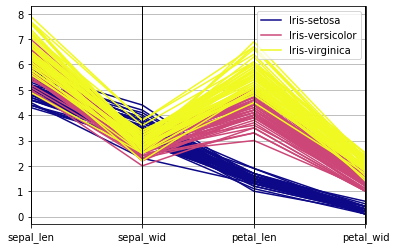

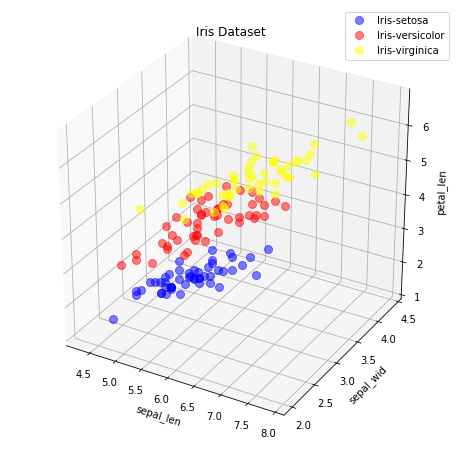

In [7]:
plt.figure()
parallel_coordinates(irisData, 'class', colormap="plasma")
make_3D_plot(irisData)
plt.show()

---

## Step 1: Standardize Data 

In [8]:
standardScaler = preprocessing.StandardScaler()
standardizedData = standardScaler.fit_transform(irisData.iloc[:,:4])

irisStandardizedData = pd.DataFrame(standardizedData, columns=irisData.columns[:4])
irisStandardizedData["class"] = irisData["class"]

In [9]:
irisStandardizedData

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [11]:
irisValues = irisStandardizedData.iloc[:,:4].values
print(irisValues)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

## Step 2: Create Covariance Matrix

In [13]:
# calculate covariance matrix of centered matrix (use T)
covarianceMatrix = cov(irisValues.T)
covarianceMatrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Step 3: Find Eigenvecotrs and Eigenvalues to the Matrix

In [14]:
# eigendecomposition of covariance matrix
eigenValues, eigenVectors = eig(covarianceMatrix)
print(eigenValues)
print(eigenVectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Plot Eigenvalue Distribution to find vectors with the highest variance

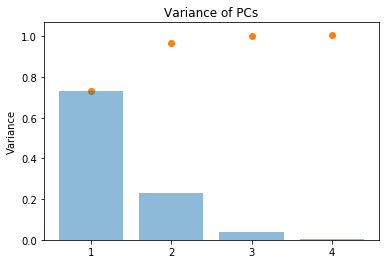

In [15]:
objects = list(range(1,len(eigenValues)+1))
y_pos = list(range(1,len(eigenValues)+1))
performance = eigenValues/len(eigenValues)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.scatter(x=[1,2,3,4], y=np.cumsum(eigenValues/4))
plt.ylabel('Variance')
plt.title('Variance of PCs')
 
plt.show()

## Step 4: Project Original Data onto new PC coordinates (new feature space)

In [16]:
pc_Matrix = eigenVectors[:,:2]
print(eigenVectors)
print("----------")
print(pc_Matrix)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
----------
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [17]:
transformedData = irisValues.dot(pc_Matrix)
transformedData
# equivalent to transformedData = pc_Matrix.dot(irisValues.T).T

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

### Plot new data and feature space

In [ ]:
transformedFrame = pd.DataFrame(transformedData, columns=["PC1", "PC2"])
transformedFrame["class"] = irisData["class"]

make_2D_plot(transformedFrame)

---

## Step 0: Do it with sklearn :)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
pcaTransformedData = pca.fit_transform(irisValues)

In [ ]:
pcaTransformedFrame = pd.DataFrame(pcaTransformedData, columns=["PC1", "PC2"])
pcaTransformedFrame["class"] = irisData["class"]

make_2D_plot(pcaTransformedFrame)

In [ ]:
print(pca)